# CSE 6250 BD4H Final Report

## Team

Team G3: Imran Yasin(iyasin3), Taehyeok Jang(tjang31)

## Paper
*GAMENet: Graph Augmented MEmory Networks for Recommending Medication Combination*

Junyuan Shang,1,2 Cao Xiao,3 Tengfei Ma,3 Hongyan Li,1,2 Jimeng Sun


## Final Presentation

https://drive.google.com/file/d/13G7AJSqdfhXYhPE-wgbohNFOkzxwzNXq/view?usp=drive_link


# Introduction



## Background of the problem

  * **What type of problem**
      * Medication recommendation; provide personalized and safe medication recommendation by integrating patients' health records and knowledge about drug-drug interactions.
  * **What is the importance/meaning of solving the problem**
      * In healthcare perspectives, introducing a methodology for medication recommendation that models longitudinal medication usage while considering drug safety is proposed. This integrated approach demonstrates superior effectiveness and safety compared to other state-of-the-art methods.
      * In deep learning perspectives, the paper successfully adopts various cutting-edge models. Notably, Graph Convolutional Networks model medication as nodes and drug-drug interactions as links, Memory Augmented Neural Networks aid in memorizing patient history and medical knowledge, and Graph Augmented Memory Networks fuse multiple knowledge graphs using a late-fusion mechanism, enabling attention-based memory search using queries generated from longitudinal patient records.

  * **What is the difficulty of the problem**
      * 1) Integrating and merging multiple data sources with varying attributes; Electronic Health Records (EHR) present temporal sequences, while drug-drug interactions entail external knowledge, requiring representation as a graph, with a focus on node interactions.
      * 2) Balancing both the effectiveness and safety of the model in medication recommendation; the paper seeks to recommend the best-personalized medication while mitigating the risk of harmful combinations. In this paper, combined loss functions are proposed to find a balance between the effectiveness and safety in recommendation.

  * **the state of the art methods and effectiveness**
      * Before GAMENet, there were two main types of methods for medication recommendation: instance-based models, which focus on the current patient encounter without considering longitudinal patient history, and longitudinal models, which utilize patient history but often ignore safety considerations like drug-drug interactions. However, GAMENet surpasses these methods by integrating drug knowledge with patient history in a unified deep-learning model. It demonstrates superior effectiveness in recommending safe and personalized medication combinations, as evidenced by its performance metrics compared to state-of-the-art models. GAMENet achieved better effectiveness measures and a 3.60% reduction in drug-drug interaction rates on real EHR data compared to baselines, highlighting its ability to recommend safer medication combinations.


## Paper explanation
  * **What did the paper propose**
      * The paper proposes an end-to-end deep learning model that integrates drug-drug interactions knowledge graph via a memory module implemented as graph convolutional networks, with longitudinal patient records acting as the query. This approach is designed to offer safe and personalized recommendations for medication combinations.
  * **What is the innovations of the method**
      * Integration of drug-drug interactions (DDI) knowledge graph and longitudinal patient records to provide personalized and safe medication recommendations.
      * Utilization of graph convolutional networks (GCN) within a memory module to incorporate and learn from multiple data sources, including drug usage information and DDI knowledge.* Implementation of a dynamic memory that stores patient history in key-value form, facilitating case-based retrievals and personalized recommendations.

  * **How well the proposed method work (in its own metrics)**
      * GAMENet demonstrated effectiveness and safety over several state-of-the-art methods on real Electronic Health Records (EHR) data. It outperformed all baseline methods in effectiveness measures and achieved a 3.60% drug-drug interactions rate reduction from existing EHR data. This suggests that it not only is capable of recommending accurate medication combinations but also its ability to reduce potential adverse drug interactions.
  * **What is the contribution to the reasearch regime (referring the Background above, how important the paper is to the problem)**
      * In healthcare, the paper introduces a novel methodology that considers both longitudinal medication usage and drug safety. This approach demonstrates superior effectiveness and safety compared to existing methods, thus offering a valuable contribution to healthcare practices.
      * In deep learning, the paper adopts various cutting-edge models such as Graph Convolutional Networks, Memory Augmented Neural Networks, and Graph Augmented Memory Networks. These models enable the representation of medication and drug-drug interactions in a graph, facilitating more accurate recommendations based on patient records.


## Scope of Reproducibility

1.   **Hypothesis 1:** GAMENet, the suggested network, will outperform all the baseline models. (performance metrics, avoid drug-drug interactions)
2.   **Hypothesis 2:** the combined loss function (multi-label prediction loss + drug-drug interactions loss) will achieve an optimal balance between recommendation accuracy and safety.

      






## Data

  * **Source of the Data**: where the data is collected from; if data is synthetic or self-generated, explain how. If possible, please provide a link to the raw datasets.
      * MIMIC-III: patient EHR (https://physionet.org/content/mimiciii/1.4/)
      * TWOSIDES: drug-drug interactions (https://www.tatonettilab.org/offsides/)
  * **Statistics**:
      * **Basic descriptive statistics**: (refer EDA)
      * **Cross validation split:** training:validation:test = 4:1:1
      * **Label distribution**:
      

  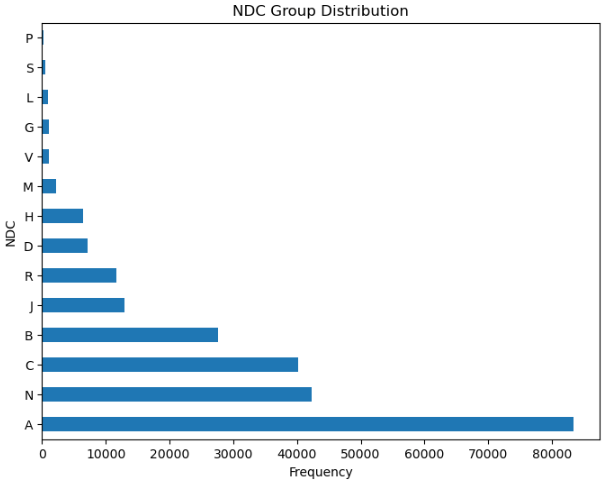

      

  * **Data process:** how do you munipulate the data, e.g., change the class labels, split the dataset to train/valid/test, refining the dataset.
      * For Patient Records:
          * 1) Load procedures, medications, and diagnoses from MIMIC-III.
          * 2) Pre-process; cleansing, mapping, and filtering by first 24 hours and frequency.
          * 3) Output; group by patient/visit and generate 'data_final.pkl' and 'records_final.pkl' (vectorized version)
      * For EHR & DDI Graph:
          * 1) Load drug-drug interactions from TWOSIDES.
          * 2) Pre-process; mapping drug codes, transforming to ATC 3 and ATC 4, and filtering top-40 severity interactions.
          * 3) Output; generate 'ehr_adj_final.pkl', the adjacency matrix of medication combinations, and 'ddi_A_final.pkl', the adjacency matrix of drug-drug interactions.
      

# Setup

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Apr 21 07:53:59 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   76C    P8              14W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
import sys
from google.colab import drive

drive.mount('/content/gdrive')

# use pre-installed pacakages
sys.path.append("/content/gdrive/MyDrive/GAMENet/colab_env/lib/python3.10/site-packages")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# we try to use pre-installed pacakages using virtualenv, but still struggle debugging now.
!pip install dill

In [4]:
!pip install dnc

# EDA


In [5]:
path = "/content/gdrive/My Drive/GAMENet/code_/data"
os.chdir(path)

print("Current working directory:", os.getcwd())

Current working directory: /content/gdrive/.shortcut-targets-by-id/1HvUJwbm1gmi_iRV21oB-A5JZClBwM9Eb/GAMENet/code_/data


## Import Data

## Generate EHR (Electronic Health Records)


In [6]:
'''
INPUT
'''
# MIMIC-III (https://mimic.physionet.org/gettingstarted/dbsetup/)
MED_FILE        = './PRESCRIPTIONS.csv'
DIAG_FILE       = './DIAGNOSES_ICD.csv'
PROCEDURE_FILE  = './PROCEDURES_ICD.csv'
# drug code mapping files
ndc2atc_file    = './ndc2atc_level4.csv'
ndc2rxnorm_file = './ndc2rxnorm_mapping.txt'

'''
OUPTUT
'''
EHR_FINAL     = './ehr_final.pkl'    # EHR ([patient_id, admission_id, list<diag>, list<med>, list<proc>, len(med)])
RECORD_FINAL  = './records_final.pkl'  # vectorized EHR
VOC_FINAL     = './voc_final.pkl'     # {'diag_voc':diag_voc, 'med_voc':med_voc,'pro_voc':pro_voc}

In [7]:
import dill
import pandas as pd

def process_med():
    def filter_first24hour_med(med_pd):
        med_pd_new = med_pd.drop(columns=['NDC'])
        med_pd_new = med_pd_new.groupby(by=['SUBJECT_ID','HADM_ID','ICUSTAY_ID']).head(1).reset_index(drop=True)
        med_pd_new = pd.merge(med_pd_new, med_pd, on=['SUBJECT_ID','HADM_ID','ICUSTAY_ID','STARTDATE'])
        med_pd_new = med_pd_new.drop(columns=['STARTDATE'])
        return med_pd_new

    # visit > 2
    def process_visit_lg2(med_pd):
        a = med_pd[['SUBJECT_ID', 'HADM_ID']].groupby(by='SUBJECT_ID')['HADM_ID'].unique().reset_index()
        a['HADM_ID_Len'] = a['HADM_ID'].map(lambda x:len(x))
        a = a[a['HADM_ID_Len'] > 1]
        return a

    med_pd = pd.read_csv(MED_FILE)
    # filter
    med_pd.drop(columns=['ROW_ID','DRUG_TYPE','DRUG_NAME_POE','DRUG_NAME_GENERIC',
                     'FORMULARY_DRUG_CD','GSN','PROD_STRENGTH','DOSE_VAL_RX',
                     'DOSE_UNIT_RX','FORM_VAL_DISP','FORM_UNIT_DISP','FORM_UNIT_DISP',
                      'ROUTE','ENDDATE','DRUG'], axis=1, inplace=True)
    med_pd.drop(index = med_pd[med_pd['NDC'] == 0.0].index, axis=0, inplace=True)

    med_pd.fillna(method='pad', inplace=True)
    med_pd.dropna(inplace=True)
    med_pd.drop_duplicates(inplace=True)
    med_pd['NDC'] = med_pd['NDC'].apply(lambda x: '{:011.0f}'.format(x))
    med_pd['ICUSTAY_ID'] = med_pd['ICUSTAY_ID'].astype('int64')
    med_pd['STARTDATE'] = pd.to_datetime(med_pd['STARTDATE'], format='%Y-%m-%d %H:%M:%S')
    med_pd.sort_values(by=['SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'STARTDATE'], inplace=True)
    med_pd = med_pd.reset_index(drop=True)

    med_pd = filter_first24hour_med(med_pd)
    med_pd = med_pd.drop(columns=['ICUSTAY_ID'])
    med_pd = med_pd.drop_duplicates()
    med_pd = med_pd.reset_index(drop=True)

    med_pd_lg2 = process_visit_lg2(med_pd).reset_index(drop=True)
    med_pd = med_pd.merge(med_pd_lg2[['SUBJECT_ID']], on='SUBJECT_ID', how='inner')

    med_pd = med_pd.reset_index(drop=True)

    return med_pd

def ndc2atc4(med_pd):
    with open(ndc2rxnorm_file, 'r') as f:
        ndc2rxnorm = eval(f.read())
    '''
    {'00338500341': u'1665046', '00064100133': u'545106', '00069077038': u'616287', '00085043104': u'746189', ...}
    '''

    ndc2rxnorm.pop('idx')

    med_pd['RXCUI'] = med_pd['NDC'].map(ndc2rxnorm)
    med_pd.dropna(inplace=True)

    rxnorm2atc = pd.read_csv(ndc2atc_file)
    rxnorm2atc = rxnorm2atc.drop(columns=['YEAR','MONTH','NDC'])
    rxnorm2atc.drop_duplicates(subset=['RXCUI'], inplace=True)
    med_pd.drop(index = med_pd[med_pd['RXCUI'].isin([''])].index, axis=0, inplace=True)

    med_pd['RXCUI'] = med_pd['RXCUI'].astype('int64')
    med_pd = med_pd.reset_index(drop=True)
    med_pd = med_pd.merge(rxnorm2atc, on=['RXCUI'])
    med_pd.drop(columns=['NDC', 'RXCUI'], inplace=True)
    med_pd = med_pd.rename(columns={'ATC4':'NDC'})
    med_pd['NDC'] = med_pd['NDC'].map(lambda x: x[:4])
    med_pd = med_pd.drop_duplicates()
    med_pd = med_pd.reset_index(drop=True)

    return med_pd

def process_diag():
    diag_pd = pd.read_csv(DIAG_FILE)
    diag_pd.dropna(inplace=True)
    diag_pd.drop(columns=['SEQ_NUM','ROW_ID'],inplace=True)
    diag_pd.drop_duplicates(inplace=True)
    diag_pd.sort_values(by=['SUBJECT_ID','HADM_ID'], inplace=True)
    return diag_pd.reset_index(drop=True)

def process_proc():
    proc_pd = pd.read_csv(PROCEDURE_FILE, dtype={'ICD9_CODE':'category'})
    proc_pd.drop(columns=['ROW_ID'], inplace=True)
    proc_pd.drop_duplicates(inplace=True)
    proc_pd.sort_values(by=['SUBJECT_ID', 'HADM_ID', 'SEQ_NUM'], inplace=True)
    proc_pd.drop(columns=['SEQ_NUM'], inplace=True)
    proc_pd.drop_duplicates(inplace=True)
    proc_pd.reset_index(drop=True, inplace=True)

    return proc_pd

def filter_300_most_med(med_pd):
    med_count = med_pd.groupby(by=['NDC']).size().reset_index().rename(columns={0:'count'}).sort_values(by=['count', 'NDC'],ascending=[False, True]).reset_index(drop=True)
    med_pd = med_pd[med_pd['NDC'].isin(med_count.loc[:299, 'NDC'])]

    return med_pd.reset_index(drop=True)

def filter_2000_most_diag(diag_pd):
    diag_count = diag_pd.groupby(by=['ICD9_CODE']).size().reset_index().rename(columns={0:'count'}).sort_values(by=['count', 'ICD9_CODE'],ascending=[False, True]).reset_index(drop=True)
    diag_pd = diag_pd[diag_pd['ICD9_CODE'].isin(diag_count.loc[:1999, 'ICD9_CODE'])]

    return diag_pd.reset_index(drop=True)

def filter_1000_most_proc(proc_pd):
    proc_count = proc_pd.groupby(by=['ICD9_CODE']).size().reset_index().rename(columns={0:'count'}).sort_values(by=['count'],ascending=False).reset_index(drop=True)
    proc_pd = proc_pd[proc_pd['ICD9_CODE'].isin(proc_count.loc[:1000, 'ICD9_CODE'])]

    return proc_pd.reset_index(drop=True)

In [8]:
class Voc(object):
    def __init__(self):
        self.idx2word = {}
        self.word2idx = {}

    def add_sentence(self, sentence):
        for word in sentence:
            if word not in self.word2idx:
                self.idx2word[len(self.word2idx)] = word
                self.word2idx[word] = len(self.word2idx)

def create_str_token_mapping(df):
    diag_voc = Voc()
    med_voc = Voc()
    pro_voc = Voc()
    for index, row in df.iterrows():
        diag_voc.add_sentence(row['ICD9_CODE'])
        med_voc.add_sentence(row['NDC'])
        pro_voc.add_sentence(row['PRO_CODE'])

    dill.dump(obj={'diag_voc':diag_voc, 'med_voc':med_voc,'pro_voc':pro_voc}, file=open(VOC_FINAL,'wb'))

    return diag_voc, med_voc, pro_voc

def save_patient_record(ehr, diag_voc, med_voc, pro_voc):
    records = [] # (patient, code_kind: 3, codes)  code_kind:diag, proc, med
    for subject_id in ehr['SUBJECT_ID'].unique():
        item_df = ehr[ehr['SUBJECT_ID'] == subject_id]
        patient = []
        for index, row in item_df.iterrows():
            admission = []
            admission.append([diag_voc.word2idx[i] for i in row['ICD9_CODE']])
            admission.append([pro_voc.word2idx[i] for i in row['PRO_CODE']])
            admission.append([med_voc.word2idx[i] for i in row['NDC']])
            patient.append(admission)
        records.append(patient)
    dill.dump(obj=records, file=open(RECORD_FINAL, 'wb'))

    return records

In [9]:
med_pd = process_med()
med_pd = ndc2atc4(med_pd)
med_pd = filter_300_most_med(med_pd)

diag_pd = process_diag()
diag_pd = filter_2000_most_diag(diag_pd)

proc_pd = process_proc()
# proc_pd = filter_1000_most_proc(proc_pd)

<ipython-input-7-4cde7ef053ec>:19: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  med_pd = pd.read_csv(MED_FILE)


In [10]:
med_pd_key = med_pd[['SUBJECT_ID', 'HADM_ID']].drop_duplicates()
diag_pd_key = diag_pd[['SUBJECT_ID', 'HADM_ID']].drop_duplicates()
proc_pd_key = proc_pd[['SUBJECT_ID', 'HADM_ID']].drop_duplicates()

combined_key = med_pd_key.merge(diag_pd_key, on=['SUBJECT_ID', 'HADM_ID'], how='inner')\
                         .merge(proc_pd_key, on=['SUBJECT_ID', 'HADM_ID'], how='inner')

med_pd = med_pd.merge(combined_key, on=['SUBJECT_ID', 'HADM_ID'], how='inner')
diag_pd = diag_pd.merge(combined_key, on=['SUBJECT_ID', 'HADM_ID'], how='inner')
proc_pd = proc_pd.merge(combined_key, on=['SUBJECT_ID', 'HADM_ID'], how='inner')

# flatten and merge
diag_pd = diag_pd.groupby(by=['SUBJECT_ID','HADM_ID'])['ICD9_CODE'].unique().reset_index()
med_pd = med_pd.groupby(by=['SUBJECT_ID', 'HADM_ID'])['NDC'].unique().reset_index()
proc_pd = proc_pd.groupby(by=['SUBJECT_ID','HADM_ID'])['ICD9_CODE'].unique().reset_index().rename(columns={'ICD9_CODE':'PRO_CODE'})
med_pd['NDC'] = med_pd['NDC'].map(lambda x: list(x))
proc_pd['PRO_CODE'] = proc_pd['PRO_CODE'].map(lambda x: list(x))

In [11]:
combined_key

,SUBJECT_ID,HADM_ID
0,17,161087
1,17,194023
2,23,152223
3,36,182104
4,103,130744
...,...,...
15011,27714,179593
15012,59948,186194
15013,9911,152237
15014,16634,148327


In [12]:
ehr = med_pd.merge(diag_pd, on=['SUBJECT_ID', 'HADM_ID'], how='inner')
ehr = ehr.merge(proc_pd, on=['SUBJECT_ID', 'HADM_ID'], how='inner')
ehr['NDC_Len'] = ehr['NDC'].map(lambda x: len(x))

ehr.to_pickle(EHR_FINAL)

In [13]:
ehr

,SUBJECT_ID,HADM_ID,NDC,ICD9_CODE,PRO_CODE,NDC_Len
0,17,161087,"[N02B, A01A, A02B, A06A, B05C, A12A, A12C, C01...","[4239, 5119, 78551, 4589, 311, 7220, 71946, 2724]","[3731, 8872, 3893]",14
1,17,194023,"[N02B, A01A, A02B, A06A, A12A, B05C, A12C, C01...","[7455, 45829, V1259, 2724]","[3571, 3961, 8872]",15
2,21,109451,"[A06A, C07A, A12A, A02A, J01M, C02A, B05C, B01...","[41071, 78551, 5781, 5849, 40391, 4280, 4592, ...","[0066, 3761, 3950, 3606, 0042, 0047, 3895, 399...",17
3,21,111970,"[A06A, B05C, A12C, A07A, N02B, B01A, N06A, A01...","[0388, 78552, 40391, 42731, 70709, 5119, 6823,...","[3995, 8961, 0014]",17
4,23,124321,"[C07A, N02B, A02B, H03A, N03A, A01A, N05A, C09...","[2252, 3485, 78039, 4241, 4019, 2720, 2724, V4...",[0151],11
...,...,...,...,...,...,...
15011,99923,164914,"[N02B, B01A, A06A, J01M, A07A]","[45829, 4532, 2761, 5723, 4561, 45621, 5849, 7...","[5491, 4513]",5
15012,99923,192053,"[A06A, A12A, A12C, N01A, C07A, B01A, A02B, A04...","[5712, 5856, 5724, 40391, 9974, 5601, 30393, V...","[5059, 504, 5569, 0093]",18
15013,99982,112748,"[A01A, C03C, A06A, A02B, A12C, B05C, C01A, B01...","[4280, 42823, 5849, 4254, 2763, 42731, 78729, ...",[3721],11
15014,99982,151454,"[C03C, A02B, A06A, C07A, C09C, A12B]","[42823, 4254, 2875, 42731, 3970, 5303, 4280, V...","[3527, 3961]",6


In [14]:
diag_voc, med_voc, pro_voc = create_str_token_mapping(ehr)
records = save_patient_record(ehr, diag_voc, med_voc, pro_voc)

In [15]:
records[:1]

[[[[0, 1, 2, 3, 4, 5, 6, 7],
   [0, 1, 2],
   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]],
  [[8, 9, 10, 7],
   [3, 4, 1],
   [0, 1, 2, 3, 5, 4, 6, 7, 8, 9, 10, 11, 13, 14, 15]]]]

In [16]:
def statistics():
    print('#patients ', ehr['SUBJECT_ID'].unique().shape)
    print('#clinical events ', len(ehr))

    diag = ehr['ICD9_CODE'].values
    med = ehr['NDC'].values
    pro = ehr['PRO_CODE'].values

    unique_diag = set([j for i in diag for j in list(i)])
    unique_med = set([j for i in med for j in list(i)])
    unique_pro = set([j for i in pro for j in list(i)])

    print('#diagnosis ', len(unique_diag))
    print('#med ', len(unique_med))
    print('#procedure', len(unique_pro))

    avg_diag = 0
    avg_med = 0
    avg_pro = 0
    max_diag = 0
    max_med = 0
    max_pro = 0
    cnt = 0
    max_visit = 0
    avg_visit = 0

    for subject_id in ehr['SUBJECT_ID'].unique():
        item_data = ehr[ehr['SUBJECT_ID'] == subject_id]
        x = []
        y = []
        z = []
        visit_cnt = 0
        for index, row in item_data.iterrows():
            visit_cnt += 1
            cnt += 1
            x.extend(list(row['ICD9_CODE']))
            y.extend(list(row['NDC']))
            z.extend(list(row['PRO_CODE']))
        x = set(x)
        y = set(y)
        z = set(z)
        avg_diag += len(x)
        avg_med += len(y)
        avg_pro += len(z)
        avg_visit += visit_cnt
        if len(x) > max_diag:
            max_diag = len(x)
        if len(y) > max_med:
            max_med = len(y)
        if len(z) > max_pro:
            max_pro = len(z)
        if visit_cnt > max_visit:
            max_visit = visit_cnt

    print('#avg of diagnoses ', avg_diag/ cnt)
    print('#avg of medicines ', avg_med/ cnt)
    print('#avg of procedures ', avg_pro/ cnt)
    print('#avg of vists ', avg_visit/ len(ehr['SUBJECT_ID'].unique()))

    print('#max of diagnoses ', max_diag)
    print('#max of medicines ', max_med)
    print('#max of procedures ', max_pro)
    print('#max of visit ', max_visit)

## Statistics

In [17]:
statistics()

#patients  (6350,)
#clinical events  15016
#diagnosis  1959
#med  145
#procedure 1426
#avg of diagnoses  10.515716568993074
#avg of medicines  8.80420884389984
#avg of procedures  3.8445657964837507
#avg of vists  2.3647244094488187
#max of diagnoses  128
#max of medicines  55
#max of procedures  50
#max of visit  29


## Generate Knowledge Graphs (EHR, Drug-drug Interactions)

In [18]:
'''
INPUT
'''
# EHR
VOC_FINAL     = './voc_final.pkl'
RECORD_FINAL  = './records_final.pkl'
# drug-drug interactions (https://www.dropbox.com/s/8os4pd2zmp2jemd/drug-DDI.csv?dl=0)
DDI_FILE      = './drug-DDI.csv'
CID_ATC       = './drug-atc.csv' # atc -> cid
TOPK          = 40 # topk drug-drug interaction

'''
OUPTUT
'''
EHR_ADJ_FINAL = './ehr_adj_final.pkl' # EHR adjacent matrix
DDI_ADJ_FINAL = './ddi_A_final.pkl'   # DDI adjacent matrix

In [19]:
import pandas as pd
import numpy as np
from collections import defaultdict
import dill

records =  dill.load(open(RECORD_FINAL, 'rb'))
cid2atc_dic = defaultdict(set)
med_voc = dill.load(open(VOC_FINAL, 'rb'))['med_voc']
med_voc_size = len(med_voc.idx2word)
med_unique_word = [med_voc.idx2word[i] for i in range(med_voc_size)]

atc3_atc4_dic = defaultdict(set)
for item in med_unique_word:
    atc3_atc4_dic[item[:4]].add(item)

with open(CID_ATC, 'r') as f:
    for line in f:
        line_ls = line[:-1].split(',')
        cid = line_ls[0]
        atcs = line_ls[1:]
        for atc in atcs:
            if len(atc3_atc4_dic[atc[:4]]) != 0:
                cid2atc_dic[cid].add(atc[:4])

# ddi load
ddi_df = pd.read_csv(DDI_FILE)
# fliter severe side effect
ddi_most_pd = ddi_df.groupby(by=['Polypharmacy Side Effect', 'Side Effect Name']).size().reset_index().rename(columns={0:'count'}).sort_values(by=['count'],ascending=False).reset_index(drop=True)
ddi_most_pd = ddi_most_pd.iloc[-TOPK:,:]
# ddi_most_pd = pd.DataFrame(columns=['Side Effect Name'], data=['as','asd','as'])
fliter_ddi_df = ddi_df.merge(ddi_most_pd[['Side Effect Name']], how='inner', on=['Side Effect Name'])
ddi_df = fliter_ddi_df[['STITCH 1','STITCH 2']].drop_duplicates().reset_index(drop=True)

In [20]:
ddi_df

,STITCH 1,STITCH 2
0,CID000002802,CID000003639
1,CID000000937,CID000002250
2,CID000005038,CID000027661
3,CID000005038,CID000006691
4,CID000000937,CID000027661
...,...,...
455,CID000004044,CID000004542
456,CID000000450,CID000000853
457,CID000010631,CID000060852
458,CID000000450,CID000060852


In [21]:
# weighted ehr adj
ehr_adj = np.zeros((med_voc_size, med_voc_size))
for patient in records:
    for adm in patient:
        med_set = adm[2]
        for i, med_i in enumerate(med_set):
            for j, med_j in enumerate(med_set):
                if j<=i:
                    continue
                ehr_adj[med_i, med_j] = 1
                ehr_adj[med_j, med_i] = 1
dill.dump(ehr_adj, open(EHR_ADJ_FINAL, 'wb'))

print('complete ehr_adj_final.pkl!')

complete ehr_adj_final.pkl!


In [22]:
print("ehr_adj: {} x {}".format(len(ehr_adj), len(ehr_adj[0])))
ehr_adj

ehr_adj: 145 x 145


array([[0., 1., 1., ..., 1., 1., 1.],
       [1., 0., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

In [23]:
# ddi adj
ddi_adj = np.zeros((med_voc_size,med_voc_size))

ddi_df
for index, row in ddi_df.iterrows():
    # ddi
    cid1 = row['STITCH 1']
    cid2 = row['STITCH 2']

    # cid -> atc_level3
    for atc_i in cid2atc_dic[cid1]:
        for atc_j in cid2atc_dic[cid2]:
            # atc_level3 -> atc_level4
            for i in atc3_atc4_dic[atc_i]:
                for j in atc3_atc4_dic[atc_j]:
                    if med_voc.word2idx[i] != med_voc.word2idx[j]:
                        # print("\"{} {}\",".format(i, j))
                        ddi_adj[med_voc.word2idx[i], med_voc.word2idx[j]] = 1
                        ddi_adj[med_voc.word2idx[j], med_voc.word2idx[i]] = 1
dill.dump(ddi_adj, open(DDI_ADJ_FINAL, 'wb'))

print('complete ddi_A_final.pkl!')

complete ddi_A_final.pkl!


In [24]:
print("ddi_adj: {} x {}".format(len(ddi_adj), len(ddi_adj[0])))
ddi_adj

ddi_adj: 145 x 145


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
np.count_nonzero(ddi_adj == 1.0)

924

# Model


  * **Model architecture**
  <!-- <figure>
    <img src="https://drive.google.com/uc?export=view&id=1Sla0bqhFsKUEMk7oxIrUAIViyR3uLjOD" height="360">
    <figcaption>Figure 4. GAMENet model architecture</figcaption>
  </figure> -->

  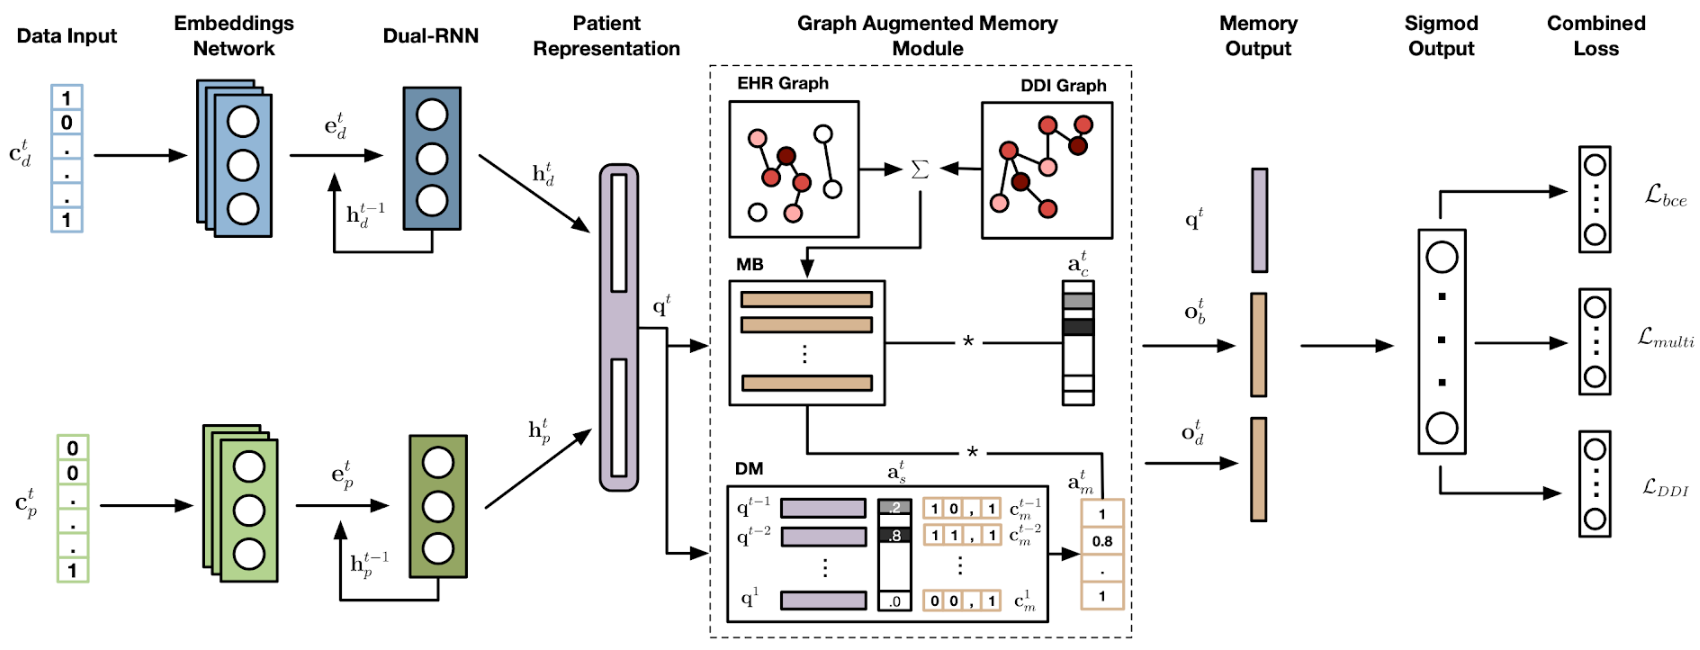 Figure. GAMENet model architecture
      
      * **GAMENet** integrates several components.
          * Embedding Module
              * a medical embedding module that transforms visit data into embeddings. This module uses linear embeddings for medical codes (diagnoses, procedures, medications) at each visit.
          * Patient Representation Module
              * Dual-RNN (Recurrent Neural Networks) for patient representation, tailored to encode patient EHR data for personalized medication recommendation. These RNNs are designed to handle different modalities (diagnosis and procedure codes) separately.
          * Graph-Augmented Memory Module
              * A memory module that embeds and stores the EHR graph and the DDI (drug-drug interaction) graph as facts in a Memory Bank (MB), and inserts patient history into Dynamic Memory (DM) in key-value form.
              * The memory module is further enhanced with graph convolutional networks (GCN) for embedding the knowledge graphs (drug usage information and DDI).
              * The model uses attention mechanisms for memory reading and response generation.
      * **Activation function**
          * The activation functions used in the model include the tanh function and the sigmoid function(σ). The tanh function is utilized in the GCN for generating node embeddings, and the sigmoid function is used in the final step to predict multi-label medication outcomes.

  * **Training Objectives**: loss function, optimizer, weight of each loss term, etc
      * **Loss function**
          * The training objectives include a multi-label prediction loss, which is a combination of binary cross-entropy loss and multi-label margin loss, and a DDI loss designed to control drug-drug interactions in the recommendation. A combined loss function is optimized to balance recommendation accuracy and safety.
      * **Optimizer**
          * The model parameters are optimized end-to-end, using a standard optimizer such as Adam.
      * **Weight of each loss term**
          * The multi-label prediction loss and DDI loss are combined, with a transformation between these losses regulated by a certain probability. This probability is adjusted based on the DDI rate of recommended medication sets calculated at each training step, aiming to find an optimal balance between effectiveness and safety.
  * **Others**


In [26]:
path = "/content/gdrive/My Drive/GAMENet/code_"
os.chdir(path)

print("Current working directory:", os.getcwd())

Current working directory: /content/gdrive/.shortcut-targets-by-id/1HvUJwbm1gmi_iRV21oB-A5JZClBwM9Eb/GAMENet/code_


In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.parameter import Parameter
import numpy as np
import math
from dnc import DNC

## Components


In [28]:
class GraphConvolution(nn.Module):
    def __init__(self, in_features, out_features, bias=True):
        super(GraphConvolution, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.weight = Parameter(torch.FloatTensor(in_features, out_features))
        if bias:
            self.bias = Parameter(torch.FloatTensor(out_features))
        else:
            self.register_parameter('bias', None)
        self.reset_parameters()

    def reset_parameters(self):
        stdv = 1. / math.sqrt(self.weight.size(1))
        self.weight.data.uniform_(-stdv, stdv)
        if self.bias is not None:
            self.bias.data.uniform_(-stdv, stdv)

    def forward(self, input, adj):
        support = torch.mm(input, self.weight)
        output = torch.mm(adj, support)
        if self.bias is not None:
            return output + self.bias
        else:
            return output

    def __repr__(self):
        return self.__class__.__name__ + ' (' \
               + str(self.in_features) + ' -> ' \
               + str(self.out_features) + ')'

"""
A simple GCN layer (https://arxiv.org/abs/1609.02907)
"""
class GCN(nn.Module):
    def __init__(self, voc_size, emb_dim, adj, device=torch.device('cpu:0')):
        super(GCN, self).__init__()
        self.voc_size = voc_size
        self.emb_dim = emb_dim
        self.device = device

        adj = self.normalize(adj + np.eye(adj.shape[0]))

        self.adj = torch.FloatTensor(adj).to(device)
        self.x = torch.eye(voc_size).to(device)

        self.gcn1 = GraphConvolution(voc_size, emb_dim)
        self.dropout = nn.Dropout(p=0.3)
        self.gcn2 = GraphConvolution(emb_dim, emb_dim)

    def forward(self):
        node_embedding = self.gcn1(self.x, self.adj) # the input feature is just represented as a standard one-hot vector.
        node_embedding = F.relu(node_embedding)
        node_embedding = self.dropout(node_embedding)
        node_embedding = self.gcn2(node_embedding, self.adj)
        return node_embedding

    def normalize(self, mx):
        """
        row-normalize sparse matrix
        i.e. normalized_mx = diag(1/row_sum(A_ij))⋅mx
        """

        rowsum = np.array(mx.sum(1))
        r_inv = np.power(rowsum, -1).flatten()
        r_inv[np.isinf(r_inv)] = 0.
        r_mat_inv = np.diagflat(r_inv)
        mx = r_mat_inv.dot(mx)
        return mx

## GAMENet

In [29]:
class GAMENet(nn.Module):
    def __init__(self, vocab_size, ehr_adj, ddi_adj, emb_dim=64, device=torch.device('cpu:0'), ddi_in_memory=True):
        """
        vocab_size: (diag, proc, med)
        K = len(vocab_size) = 3
        """
        super(GAMENet, self).__init__()
        K = len(vocab_size)
        self.K = K
        self.vocab_size = vocab_size
        self.device = device
        self.tensor_ddi_adj = torch.FloatTensor(ddi_adj).to(device)
        self.ddi_in_memory = ddi_in_memory
        self.embeddings = nn.ModuleList(
            [nn.Embedding(vocab_size[i], emb_dim) for i in range(K-1)])
        self.dropout = nn.Dropout(p=0.4)

        self.encoders = nn.ModuleList([nn.GRU(emb_dim, emb_dim*2, batch_first=True) for _ in range(K-1)])

        self.query = nn.Sequential(
            nn.ReLU(),
            nn.Linear(emb_dim * 4, emb_dim),
        )

        self.ehr_gcn = GCN(voc_size=vocab_size[2], emb_dim=emb_dim, adj=ehr_adj, device=device)
        self.ddi_gcn = GCN(voc_size=vocab_size[2], emb_dim=emb_dim, adj=ddi_adj, device=device)
        self.inter = nn.Parameter(torch.FloatTensor(1))

        self.output = nn.Sequential(
            nn.ReLU(),
            nn.Linear(emb_dim * 3, emb_dim * 2),
            nn.ReLU(),
            nn.Linear(emb_dim * 2, vocab_size[2])
        )

        self.init_weights()

    def forward(self, input):
        # input (adm, 3, codes)

        # generate medical embeddings and queries
        i1_seq = []
        i2_seq = []
        def mean_embedding(embedding):
            return embedding.mean(dim=1).unsqueeze(dim=0)  # (1,1,dim)
        for adm in input:
            i1 = mean_embedding(self.dropout(self.embeddings[0](torch.LongTensor(adm[0]).unsqueeze(dim=0).to(self.device)))) # (1,1,dim)
            i2 = mean_embedding(self.dropout(self.embeddings[1](torch.LongTensor(adm[1]).unsqueeze(dim=0).to(self.device))))
            i1_seq.append(i1)
            i2_seq.append(i2)
        i1_seq = torch.cat(i1_seq, dim=1) #(1,seq,dim)
        i2_seq = torch.cat(i2_seq, dim=1) #(1,seq,dim)

        o1, h1 = self.encoders[0](
            i1_seq
        ) # o1:(1, seq, dim*2) hi:(1,1,dim*2)
        o2, h2 = self.encoders[1](
            i2_seq
        )
        patient_representations = torch.cat([o1, o2], dim=-1).squeeze(dim=0) # (seq, dim*4)
        queries = self.query(patient_representations) # (seq, dim)

        # graph memory module
        '''I:generate current input'''
        query = queries[-1:] # (1,dim)

        '''G:generate graph memory bank and insert history information'''
        if self.ddi_in_memory:
            drug_memory = self.ehr_gcn() - self.ddi_gcn() * self.inter  # (size, dim)
        else:
            drug_memory = self.ehr_gcn()

        if len(input) > 1:
            history_keys = queries[:(queries.size(0)-1)] # (seq-1, dim)

            history_values = np.zeros((len(input)-1, self.vocab_size[2]))
            for idx, adm in enumerate(input):
                if idx == len(input)-1:
                    break
                history_values[idx, adm[2]] = 1
            history_values = torch.FloatTensor(history_values).to(self.device) # (seq-1, size)

        '''O:read from global memory bank and dynamic memory bank'''
        key_weights1 = F.softmax(torch.mm(query, drug_memory.t()), dim=-1)  # (1, size)
        fact1 = torch.mm(key_weights1, drug_memory)  # (1, dim)

        if len(input) > 1:
            visit_weight = F.softmax(torch.mm(query, history_keys.t())) # (1, seq-1)
            weighted_values = visit_weight.mm(history_values) # (1, size)
            fact2 = torch.mm(weighted_values, drug_memory) # (1, dim)
        else:
            fact2 = fact1
        '''R:convert O and predict'''
        output = self.output(torch.cat([query, fact1, fact2], dim=-1)) # (1, dim)

        if self.training:
            neg_pred_prob = F.sigmoid(output)
            neg_pred_prob = neg_pred_prob.t() * neg_pred_prob  # (voc_size, voc_size)
            batch_neg = neg_pred_prob.mul(self.tensor_ddi_adj).mean()

            return output, batch_neg
        else:
            return output

    def init_weights(self):
        initrange = 0.1
        for item in self.embeddings:
            item.weight.data.uniform_(-initrange, initrange)

        self.inter.data.uniform_(-initrange, initrange)


# Running the Model



In [30]:
import torch
import argparse
import numpy as np
import dill
import time
from torch.nn import CrossEntropyLoss
from torch.optim import Adam
import os
import torch.nn.functional as F
from collections import defaultdict

from util import llprint, multi_label_metric, ddi_rate_score, get_n_params

In [31]:
def eval(model_name, model, data_eval, voc_size, epoch):
    """
    Evaluate the model performance on the evaluation dataset.
    """
    print('')
    model.eval()
    smm_record = []
    ja, prauc, avg_p, avg_r, avg_f1 = [[] for _ in range(5)]
    case_study = defaultdict(dict)
    med_cnt = 0
    visit_cnt = 0
    for step, input in enumerate(data_eval):
        y_gt = []
        y_pred = []
        y_pred_prob = []
        y_pred_label = []
        for adm_idx, adm in enumerate(input):
            # Model predictions for the current admission
            target_output1 = model(input[:adm_idx+1])

            # Prepare ground truth
            y_gt_tmp = np.zeros(voc_size[2])
            y_gt_tmp[adm[2]] = 1
            y_gt.append(y_gt_tmp)

            # Process model output
            target_output1 = F.sigmoid(target_output1).detach().cpu().numpy()[0]
            y_pred_prob.append(target_output1)
            y_pred_tmp = target_output1.copy()
            y_pred_tmp[y_pred_tmp>=0.5] = 1
            y_pred_tmp[y_pred_tmp<0.5] = 0
            y_pred.append(y_pred_tmp)
            y_pred_label_tmp = np.where(y_pred_tmp == 1)[0]
            y_pred_label.append(sorted(y_pred_label_tmp))
            visit_cnt += 1
            med_cnt += len(y_pred_label_tmp)

        smm_record.append(y_pred_label)
        adm_ja, adm_prauc, adm_avg_p, adm_avg_r, adm_avg_f1 = multi_label_metric(np.array(y_gt), np.array(y_pred), np.array(y_pred_prob))
        case_study[adm_ja] = {'ja': adm_ja, 'patient': input, 'y_label': y_pred_label}

        ja.append(adm_ja)
        prauc.append(adm_prauc)
        avg_p.append(adm_avg_p)
        avg_r.append(adm_avg_r)
        avg_f1.append(adm_avg_f1)
        llprint('\rEval--Epoch: %d, Step: %d/%d' % (epoch, step, len(data_eval)))

    # Calculate DDI(drug-drug interactions) rate
    ddi_rate = ddi_rate_score(smm_record, path='./data/ddi_A_final.pkl')

    llprint('\tDDI Rate: %.4f, Jaccard: %.4f,  PRAUC: %.4f, AVG_PRC: %.4f, AVG_RECALL: %.4f, AVG_F1: %.4f\n' % (
        ddi_rate, np.mean(ja), np.mean(prauc), np.mean(avg_p), np.mean(avg_r), np.mean(avg_f1)
    ))
    dill.dump(obj=smm_record, file=open('./data/gamenet_records.pkl', 'wb'))
    dill.dump(case_study, open(os.path.join('saved', model_name, 'case_study.pkl'), 'wb'))

    # print('avg med', med_cnt / visit_cnt)

    return ddi_rate, np.mean(ja), np.mean(prauc), np.mean(avg_p), np.mean(avg_r), np.mean(avg_f1)

In [32]:
'''
INPUT (pre-processed)
'''
data_path       = './data/records_final.pkl'
voc_path        = './data/voc_final.pkl'
ehr_adj_path    = './data/ehr_adj_final.pkl'
ddi_adj_path    = './data/ddi_A_final.pkl'

'''
OUTPUT

In this notebook, we will train/two two GAMENet.
- model with drug-drug interactions knowledge
- model 'without' drug-drug interactions knowledge
'''
MODEL_CHECKPOINT        = 'GAMENet_.model'      # model checkpoint, which is saved iteratively every epoch
# MODEL_CHECKPOINT        = 'Epoch_%d_JA_%.4f_DDI_%.4f.model' % (epoch, ja, ddi_rate)
FINAL_MODEL             = 'final.model'         # model with last epoch
BEST_MODEL              = 'best_GAMENet.model'  # model with best performance
HISTORY                 = 'history.pkl'         # training history

In [33]:
def main(
    eval_mode=False,                    # If True, run in evaluation mode, else training mode
    model_name="default_model",         # The name of the model to use
    resume_path="default_resume_path",  # Path to a saved model checkpoint to resume train or test
    use_ddi=True,                       # Whether to use DDI (drug-drug interactions) as a knowledge
    epoch_=40,                          # Number of epochs for training
    lr_=0.0002,                         # Learning rate for training
    target_ddi_=0.05,                   # Target DDI rate for training
):
    # Config
    TEST = eval_mode
    Neg_Loss = use_ddi
    DDI_IN_MEM = use_ddi

    EPOCH = epoch_
    LR = lr_
    TARGET_DDI = target_ddi_
    T = 0.5
    decay_weight = 0.85

    # Print the current configuration to verify parameter usage
    config_ = (
        f"Evaluation Mode: {TEST}\n"
        f"Model Name: {model_name}\n"
        f"Resume Path: {resume_path}\n"
        f"Using Drug-drug Interactions: {use_ddi}\n"
        f"Epoch: {EPOCH}\n"
        f"Learning Rate: {LR}\n"
        f"Target DDI Rate: {TARGET_DDI}\n"
    )
    print(config_)

    # Set random seed for reproducibility
    torch.manual_seed(1203)
    np.random.seed(1203)

    # Ensuring the save directory exists
    if not os.path.exists(os.path.join("saved", model_name)):
        os.makedirs(os.path.join("saved", model_name))

    device = torch.device('cuda:0')

    ehr_adj     = dill.load(open(ehr_adj_path, 'rb'))
    ddi_adj     = dill.load(open(ddi_adj_path, 'rb'))
    data        = dill.load(open(data_path, 'rb'))
    voc         = dill.load(open(voc_path, 'rb'))
    diag_voc, pro_voc, med_voc = voc['diag_voc'], voc['pro_voc'], voc['med_voc']
    voc_size = (len(diag_voc.idx2word), len(pro_voc.idx2word), len(med_voc.idx2word))

    # Splitting data into training, testing, and evaluation sets
    split_point = int(len(data) * 2 / 3)
    data_train = data[:split_point]
    eval_len = int(len(data[split_point:]) / 2)
    data_test = data[split_point:split_point + eval_len]
    data_eval = data[split_point+eval_len:]

    model = GAMENet(voc_size, ehr_adj, ddi_adj, emb_dim=64, device=device, ddi_in_memory=DDI_IN_MEM)
    if TEST:
        # Load model from file if in eval mode
        model.load_state_dict(torch.load(open(resume_path, 'rb')))
    model.to(device=device)

    print('parameters', get_n_params(model))
    optimizer = Adam(list(model.parameters()), lr=LR)

    if TEST:
        # If in eval mode, evaluate the model on the test data
        eval(model_name, model, data_test, voc_size, 0)
    else:
        # Otherwise, proceed with training
        history = defaultdict(list)
        best_epoch = 0
        best_ja = 0

        for epoch in range(EPOCH):
            loss_record1 = []
            start_time = time.time()
            model.train()
            prediction_loss_cnt = 0
            neg_loss_cnt = 0
            for step, input in enumerate(data_train):
                # Training loop for each admission sequence
                for idx, adm in enumerate(input):
                    seq_input = input[:idx+1]
                    # Prepare targets for loss calculation
                    loss1_target = np.zeros((1, voc_size[2]))
                    loss1_target[:, adm[2]] = 1
                    loss3_target = np.full((1, voc_size[2]), -1)
                    for idx, item in enumerate(adm[2]):
                        loss3_target[0][idx] = item

                    target_output1, batch_neg_loss = model(seq_input)

                    # Calculate losses
                    loss1 = F.binary_cross_entropy_with_logits(target_output1, torch.FloatTensor(loss1_target).to(device))
                    loss3 = F.multilabel_margin_loss(F.sigmoid(target_output1), torch.LongTensor(loss3_target).to(device))
                    if Neg_Loss:
                        # Adjust loss based on DDI rate if negative loss is enabled
                        target_output1 = F.sigmoid(target_output1).detach().cpu().numpy()[0]
                        target_output1[target_output1 >= 0.5] = 1
                        target_output1[target_output1 < 0.5] = 0
                        y_label = np.where(target_output1 == 1)[0]
                        current_ddi_rate = ddi_rate_score([[y_label]])
                        if current_ddi_rate <= TARGET_DDI:
                            loss = 0.9 * loss1 + 0.01 * loss3
                            prediction_loss_cnt += 1
                        else:
                            rnd = np.exp((TARGET_DDI - current_ddi_rate)/T)
                            if np.random.rand(1) < rnd:
                                loss = batch_neg_loss
                                neg_loss_cnt += 1
                            else:
                                loss = 0.9 * loss1 + 0.01 * loss3
                                prediction_loss_cnt += 1
                    else:
                        loss = 0.9 * loss1 + 0.01 * loss3

                    # Backpropagation
                    optimizer.zero_grad()
                    loss.backward(retain_graph=True)
                    optimizer.step()

                    loss_record1.append(loss.item())

                llprint('\rTrain--Epoch: %d, Step: %d/%d, L_p cnt: %d, L_neg cnt: %d' % (epoch, step, len(data_train), prediction_loss_cnt, neg_loss_cnt))
            # Annealing
            T *= decay_weight

            # Evaluate model performance on evaluation set
            ddi_rate, ja, prauc, avg_p, avg_r, avg_f1 = eval(model_name, model, data_eval, voc_size, epoch)

            # Record performance metrics
            history['ja'].append(ja)
            history['ddi_rate'].append(ddi_rate)
            history['avg_p'].append(avg_p)
            history['avg_r'].append(avg_r)
            history['avg_f1'].append(avg_f1)
            history['prauc'].append(prauc)

            end_time = time.time()
            elapsed_time = (end_time - start_time) / 60
            llprint('\tEpoch: %d, Loss: %.4f, One Epoch Time: %.2fm, Appro Left Time: %.2fh\n' %
             (epoch, np.mean(loss_record1), elapsed_time, elapsed_time * (EPOCH - epoch - 1)/60))

            # Save model checkpoint
            torch.save(model.state_dict(), open( os.path.join('saved', model_name, 'Epoch_%d_JA_%.4f_DDI_%.4f.model' % (epoch, ja, ddi_rate)), 'wb'))
            print('')
            # Update best model if current performance is the best
            if epoch != 0 and best_ja < ja:
                torch.save(model.state_dict(), os.path.join('saved', model_name, BEST_MODEL))
                best_epoch = epoch
                best_ja = ja

        # Save training history
        dill.dump(history, open(os.path.join('saved', model_name, HISTORY), 'wb'))

        # Save final model
        torch.save(model.state_dict(), open(os.path.join('saved', model_name, FINAL_MODEL), 'wb'))

        print('best_epoch:', best_epoch)


## Train

In this notebook, we run the training code for models with just a single epoch to adhere to the runtime limit of 8 minutes.

Instead, we'll execute the test (evaluation) using pre-trained models."

In [34]:
# Train with drug-drug interactions knowledge
TRAIN_MODEL_NAME = 'GAMENet'
TRAIN_RESUME_PATH = 'None'

main(
    eval_mode=False,
    model_name=TRAIN_MODEL_NAME,
    resume_path=TRAIN_RESUME_PATH,
    use_ddi=True,
    epoch_=1
)

Evaluation Mode: False
Model Name: GAMENet
Resume Path: None
Using Drug-drug Interactions: True
Epoch: 1
Learning Rate: 0.0002
Target DDI Rate: 0.05

parameters 452498
Train--Epoch: 0, Step: 4232/4233, L_p cnt: 4722, L_neg cnt: 5753
Eval--Epoch: 0, Step: 1058/1059	DDI Rate: 0.0222, Jaccard: 0.3566,  PRAUC: 0.6216, AVG_PRC: 0.6405, AVG_RECALL: 0.4612, AVG_F1: 0.5177
	Epoch: 0, Loss: 0.1174, One Epoch Time: 1.95m, Appro Left Time: 0.00h

best_epoch: 0


In [35]:
# Train without drug-drug interactions knowledge
TRAIN_MODEL_NAME_without_ddi = 'GAMENet_without_ddi'
TRAIN_RESUME_PATH_without_ddi = 'None'

main(
    eval_mode=False,
    model_name=TRAIN_MODEL_NAME_without_ddi,
    resume_path=TRAIN_RESUME_PATH_without_ddi,
    use_ddi=False,
    epoch_=1
)

Evaluation Mode: False
Model Name: GAMENet_without_ddi
Resume Path: None
Using Drug-drug Interactions: False
Epoch: 1
Learning Rate: 0.0002
Target DDI Rate: 0.05

parameters 452498
Train--Epoch: 0, Step: 4232/4233, L_p cnt: 0, L_neg cnt: 0
Eval--Epoch: 0, Step: 1058/1059	DDI Rate: 0.0356, Jaccard: 0.3615,  PRAUC: 0.6271, AVG_PRC: 0.6310, AVG_RECALL: 0.4733, AVG_F1: 0.5227
	Epoch: 0, Loss: 0.2583, One Epoch Time: 1.37m, Appro Left Time: 0.00h

best_epoch: 0


## Test


### Hypothesis 1

=> GAMENet will outperform all the baseline models.

In [36]:
TEST_MODEL_NAME = 'GAMENet'
# TEST_RESUME_PATH = './saved/GAMENet/best_GAMENet.model'
TEST_RESUME_PATH = './saved/GAMENet/best_GAMENet_20240420_1600.model' # load pre-trained model

main(
    eval_mode=True,
    model_name=TEST_MODEL_NAME,
    resume_path=TEST_RESUME_PATH,
    use_ddi=True
)

Evaluation Mode: True
Model Name: GAMENet
Resume Path: ./saved/GAMENet/best_GAMENet_20240420_1600.model
Using Drug-drug Interactions: True
Epoch: 40
Learning Rate: 0.0002
Target DDI Rate: 0.05

parameters 452498

Eval--Epoch: 0, Step: 1057/1058	DDI Rate: 0.0783, Jaccard: 0.4501,  PRAUC: 0.6902, AVG_PRC: 0.6303, AVG_RECALL: 0.6195, AVG_F1: 0.6072


### Hypothesis 2

=> The combined loss function(multi-label prediction loss + drug-drug interactions loss) will achieve an optimal balance between recommendation accuracy and safety.


In [37]:
# Test model with drug-drug interactions knowledge
TEST_MODEL_NAME_case = 'GAMENet'
# TEST_RESUME_PATH_case = './saved/GAMENet/best_GAMENet.model'
TEST_RESUME_PATH_case = './saved/GAMENet/best_GAMENet_20240420_1600.model' # load pre-trained model

main(
    eval_mode=True,
    model_name=TEST_MODEL_NAME_case,
    resume_path=TEST_RESUME_PATH_case,
    use_ddi=True
)

Evaluation Mode: True
Model Name: GAMENet
Resume Path: ./saved/GAMENet/best_GAMENet_20240420_1600.model
Using Drug-drug Interactions: True
Epoch: 40
Learning Rate: 0.0002
Target DDI Rate: 0.05

parameters 452498

Eval--Epoch: 0, Step: 1057/1058	DDI Rate: 0.0783, Jaccard: 0.4501,  PRAUC: 0.6902, AVG_PRC: 0.6303, AVG_RECALL: 0.6195, AVG_F1: 0.6072


In [38]:
# Test another model without drug-drug interactions knowledge
TEST_MODEL_NAME_control = 'GAMENet_without_ddi'
# TEST_RESUME_PATH_control = './saved/GAMENet_without_ddi/best_GAMENet.model'
TEST_RESUME_PATH_control = './saved/GAMENet_without_ddi/best_GAMENet_20240420_2200.model'

main(
    eval_mode=True,
    model_name=TEST_MODEL_NAME_control,
    resume_path=TEST_RESUME_PATH_control,
    use_ddi=False
)

Evaluation Mode: True
Model Name: GAMENet_without_ddi
Resume Path: ./saved/GAMENet_without_ddi/best_GAMENet_20240420_2200.model
Using Drug-drug Interactions: False
Epoch: 40
Learning Rate: 0.0002
Target DDI Rate: 0.05

parameters 452498

Eval--Epoch: 0, Step: 1057/1058	DDI Rate: 0.0862, Jaccard: 0.4487,  PRAUC: 0.6840, AVG_PRC: 0.6202, AVG_RECALL: 0.6293, AVG_F1: 0.6063


# Results

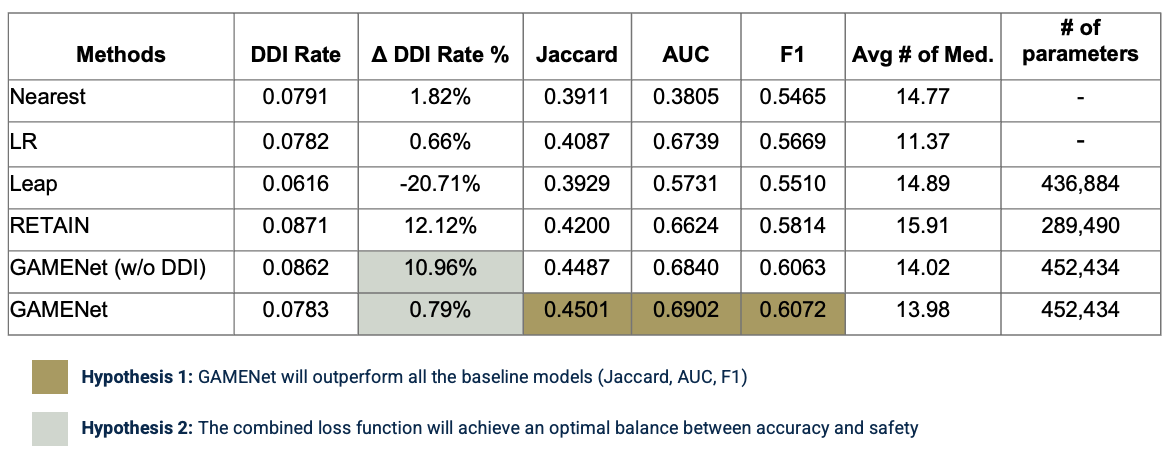 Table 1. Performance Comparison


## For Hypothesis 1,

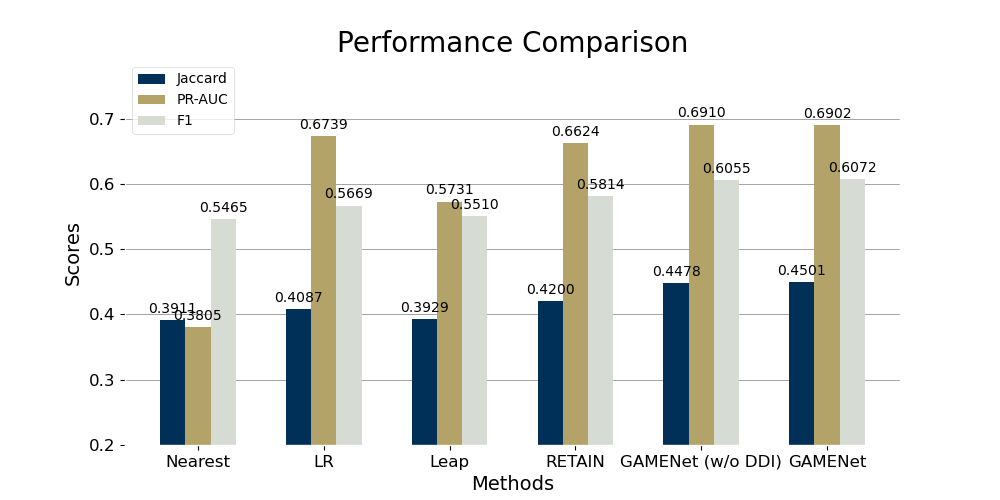 Plot 1. Jaccard/AUC/F1 for Methods






## For Hypothesis 2,

**GAMENet with Drug-drug Interactions**

Eval--Epoch: 0, Step: 1057/1058	DDI Rate: 0.0783, Jaccard: 0.4501,  PRAUC: 0.6902, AVG_PRC: 0.6303, AVG_RECALL: 0.6195, AVG_F1: 0.6072


**GAMENet without Drug-drug Interactions**

Eval--Epoch: 0, Step: 1057/1058	DDI Rate: 0.0862, Jaccard: 0.4487,  PRAUC: 0.6840, AVG_PRC: 0.6202, AVG_RECALL: 0.6293, AVG_F1: 0.6063


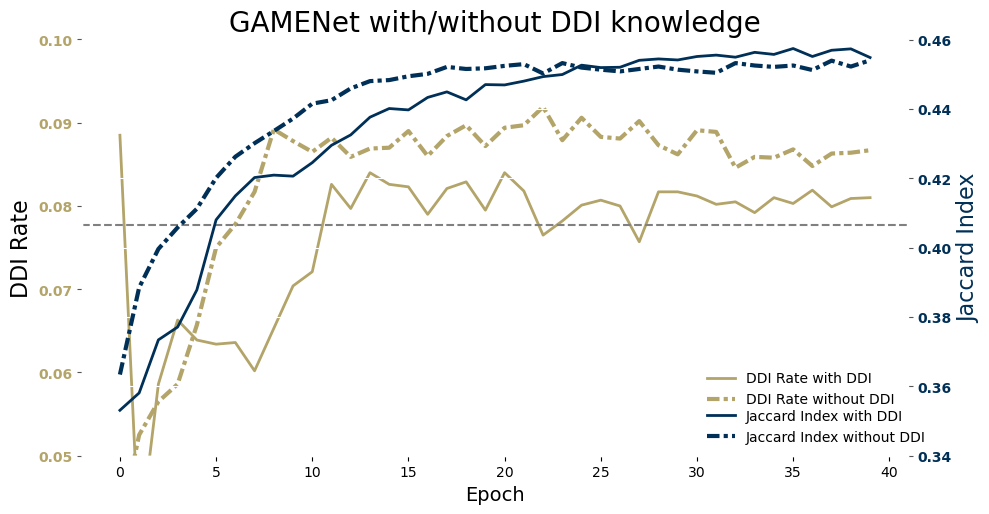 Plot 2. Accuracy and Safety of GAMENet with/without Drug-drug Interactions

# Discussion

In this section,you should discuss your work and make future plan. The discussion should address the following questions:
  * **Make assessment that the paper is reproducible or not.**
      * The paper is reproducible.
  * **Explain why it is not reproducible if your results are kind negative.**
  * **Describe “What was easy” and “What was difficult” during the reproduction.**
      * What was easy: EDA (EHR, Drug-drug Interactions)
      * What was difficult: Understanding the state-of-the-art deep learning models and incorporating them into GAMENet architecture
  * **Make suggestions to the author or other reproducers on how to improve the reproducibility.**
      * Incorporating both high-level and detailed descriptions of the model-such as the Graph Augmented Memory Module and its internal interactions—will significantly facilitate a better and quicker reproduction.
  * **What will you do in next phase.**
      * Model: have a better understanding about the model to effectively integrate components into GAMENet.
      * Optimization: optimize the model and achieve higher scores in Jaccard / PR-AUC / F1.
      * Evaluation: discuss evaluation methods to further explore the efficient model architecture. One possible question to consider is the practical effectiveness of the drug-drug interaction rate, quantified as '0.0749', in clinical practices, despite its demonstration of state-of-the-art results.



# References

1. Shang, J., Xiao, C., Ma, T., Li, H., & Sun, J. (2019, July). GAMENet: Graph Augmented MEmory Networks for Recommending Medication Combination. In proceedings of the AAAI Conference on Artificial Intelligence (Vol. 33, No. 01, pp. 1126-1133).
2. Le, H.; Tran, T.; and Venkatesh, S. 2018. Dual memory neural computer for asynchronous two-view sequential learning. In Proceedings of the 24rd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining, 1637–1645. ACM.
3. Weston, Jason, Sumit Chopra, and Antoine Bordes. "Memory networks." arXiv preprint arXiv:1410.3916 (2014).
4. Sukhbaatar, Sainbayar, Jason Weston, and Rob Fergus. "End-to-end memory networks." Advances in neural information processing systems 28 (2015).
5. Kipf, T. N., and Welling, M. 2017. Semi-supervised classification with graph convolutional networks. In International Conference on Learning Representations.

